## Credit_train

In [ ]:
# import the all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression

In [ ]:
# open the 'csv' data

In [5]:
df=pd.read_csv("credit_train.csv")

In [6]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
df.shape

(100514, 19)

__Imputing 'NA' values__

In [8]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

## Obervation
1. all variables have '514' missing values
2. 'Credit Score' and 'Annual Income' have '19668' missing value
3. 'Months sinceTax Liens last delinquent' have '53655' missing values
4. 'Bankruptcies' ,'Tax Liens' and 'Years in current job' have '718','524' and '4736' missing values

In [9]:
df.shape

(100514, 19)

In [10]:
df['Loan Status'].value_counts()*100/len(df)

Fully Paid     76.965398
Charged Off    22.523231
Name: Loan Status, dtype: float64

In [ ]:
# I Have drop the 'Months since last delinquent' variable because more than 50% missing values

In [11]:
df.drop(['Months since last delinquent','Loan ID', 'Customer ID'],axis=1,inplace=True)

In [ ]:
# I Have assain the '0' values to 'Credit Score' in the place of missing values and it used to  test data

In [12]:
df['Credit Score'].fillna(0,inplace=True)

In [ ]:
# I Have fiiling the median value to "Current Loan Amount" and '"Annual Income"'

In [13]:
df["Current Loan Amount"].fillna(value=df["Current Loan Amount"].median(),inplace=True)

In [14]:
df["Annual Income"].fillna(value=df["Annual Income"].median(),inplace=True)

In [15]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

__Dropping NAN values__

In [17]:
df.dropna(axis=0,inplace=True)

__Want to Predict Credit Score__

In [18]:
#So i selected only those rows where credit score is 0 as my test data inorder to predict the credit score
test_data=df[df['Credit Score']==0]

In [19]:
test_data.shape

(18301, 16)

In [20]:
# and remaining all as train data
train_data=df[df['Credit Score']!=0]

In [21]:
train_data.shape

(77271, 16)

In [22]:
train_data.drop('Loan Status',axis=1,inplace=True)

C:\Users\Zestkart.in\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
train_data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [21]:
# Splitting data manually as x_train and y_train inorder to predict credit score using linear regression

In [24]:
credit_train_y=train_data['Credit Score']
credit_train_x=train_data[['Current Loan Amount', 'Term',
        'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens']]

In [25]:
credit_cat=credit_train_x.select_dtypes(include='object')
credit_num=credit_train_x.select_dtypes(include='number')

In [26]:
print(credit_cat)

             Term Years in current job Home Ownership             Purpose
0      Short Term              8 years  Home Mortgage   Home Improvements
2      Short Term              8 years       Own Home  Debt Consolidation
3       Long Term              3 years       Own Home  Debt Consolidation
5      Short Term            10+ years  Home Mortgage  Debt Consolidation
6      Short Term             < 1 year  Home Mortgage  Debt Consolidation
...           ...                  ...            ...                 ...
99994  Short Term               1 year  Home Mortgage               Other
99995  Short Term              7 years       Own Home               other
99996  Short Term               1 year           Rent  Debt Consolidation
99997  Short Term              6 years           Rent  Debt Consolidation
99998  Short Term              9 years           Rent  Debt Consolidation

[77271 rows x 4 columns]


In [ ]:
#  I Have convert the Categorical data into numerical data using the 'pd.get_dummies'

In [27]:
credit_cat=pd.get_dummies(credit_cat)
credit_train_x=pd.concat([credit_cat,credit_num],axis=1)

In [28]:
test_data.drop('Loan Status',axis=1,inplace=True)

C:\Users\Zestkart.in\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
test_data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [30]:
credit_test_y=test_data['Credit Score']
credit_test_x=test_data[['Current Loan Amount', 'Term',
        'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens']]

In [31]:
credit_test_cat=credit_test_x.select_dtypes(include='object')
credit_test_num=credit_test_x.select_dtypes(include='number')

In [32]:
credit_test_cat=pd.get_dummies(credit_test_cat)
credit_test_x=pd.concat([credit_test_cat,credit_test_num],axis=1)

In [31]:
# building a linear regression model

In [33]:
lin_model=LinearRegression().fit(credit_train_x,credit_train_y)
predicted_Credit_scores=lin_model.predict(credit_test_x)

In [34]:
credit_test_x.isnull().sum()

Term_Long Term                    0
Term_Short Term                   0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_HaveMortgage       0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home           0
Home Ownership_Rent               0
Purpose_Business Loan             0
Purpose_Buy House                 0
Purpose_Buy a Car                 0
Purpose_Debt Consolidation        0
Purpose_Educational Expenses      0
Purpose_Home Improvements         0
Purpose_Medical Bills             0
Purpose_Other                     0
Purpose_Take a Trip               0
Purpose_major_purchase            0
Purpose_moving              

In [35]:
#predicted credit scores in place of nan values
predicted_Credit_scores

array([1132.09652831, 1152.22560825, 1155.42917546, ..., 1073.60058093,
       1090.31944075, 1116.5059746 ])

In [34]:
# creating new column as credit score in test data frame

In [36]:
credit_test_x['Credit Score']=predicted_Credit_scores

In [36]:
# creating new column as credit score in train data frame

In [37]:
credit_train_x['Credit Score']=credit_train_y

In [38]:
# concatinating train and teat data horizontally as a total data

In [38]:
total_data=pd.concat([credit_train_x,credit_test_x],axis=0)

In [39]:
total_data.head(5)

,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score
0,0,1,0,0,0,0,0,0,0,0,...,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.0
2,0,1,0,0,0,0,0,0,0,0,...,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0
3,1,0,0,0,0,1,0,0,0,0,...,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.0
5,0,1,0,1,0,0,0,0,0,0,...,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,7290.0
6,0,1,0,0,0,0,0,0,0,0,...,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,730.0


In [40]:
df['Loan Status'].value_counts()

Fully Paid     74257
Charged Off    21315
Name: Loan Status, dtype: int64

In [41]:
total_data['Loan Status']=df['Loan Status'].replace(to_replace=["Fully Paid","Charged Off"],value=["1","0"])

In [43]:
total_data.reset_index(drop=True,inplace=True)

In [44]:
total_data.head(5)

,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score,Loan Status
0,0,1,0,0,0,0,0,0,0,0,...,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.0,1
1,0,1,0,0,0,0,0,0,0,0,...,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0,1
2,1,0,0,0,0,1,0,0,0,0,...,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.0,1
3,0,1,0,1,0,0,0,0,0,0,...,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,7290.0,0
4,0,1,0,0,0,0,0,0,0,0,...,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,730.0,1


__Decision Tree to predict Loan Status__

In [45]:
from sklearn.tree import DecisionTreeClassifier
# from scikitplot.metrics import plot_roc_curve

In [46]:
target= total_data['Loan Status']
ind_vars= total_data.loc[:,total_data.columns!='Loan Status']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(ind_vars,target,test_size=0.2,random_state=35)

In [48]:
decisionTree_model=DecisionTreeClassifier(class_weight="balanced",criterion='entropy').fit(x_train,y_train)
train_predictions=decisionTree_model.predict(x_train)
test_predictions=decisionTree_model.predict(x_test)

In [49]:
print("Decision Tree Train Accuracy:",accuracy_score(y_train,train_predictions))
print("Decision Tree Test Accuracy:",accuracy_score(y_test,test_predictions))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7572586973580957


In [50]:
confusion_matrix(y_test,test_predictions)

array([[ 1795,  2476],
       [ 2164, 12680]], dtype=int64)

In [51]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.45      0.42      0.44      4271
           1       0.84      0.85      0.85     14844

    accuracy                           0.76     19115
   macro avg       0.65      0.64      0.64     19115
weighted avg       0.75      0.76      0.75     19115



In [53]:
# y_pred_probs = decisionTree_model.predict_proba(x_test)
# plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
# plt.show()

__Random Forest Classifier__

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

In [53]:
RF_clf = RandomForestClassifier(n_estimators=500,random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True)
RF_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0)

In [55]:
rf_train_predictions=RF_clf.predict(x_train)
print("Random Forest Train Accuracy:",accuracy_score(y_train,rf_train_predictions)*100)

rf_predictions=RF_clf.predict(x_test)
print("Random Forest Test Accuracy:",accuracy_score(y_test,rf_predictions)*100)

Random Forest Train Accuracy: 100.0
Random Forest Test Accuracy: 82.11352341093382


In [56]:
#confusion matrix
confusion_matrix(y_test,rf_predictions)

array([[  967,  3304],
       [  115, 14729]], dtype=int64)

In [57]:
#classification report
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36      4271
           1       0.82      0.99      0.90     14844

    accuracy                           0.82     19115
   macro avg       0.86      0.61      0.63     19115
weighted avg       0.83      0.82      0.78     19115



__Top 10 Important Features__

In [59]:
l1=[1,2,3,4,5]
l2=['a','b','c','d','e']
for i in zip(l1,l2):
    print(i)
    

(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')


[('Credit Score', 0.1939065852603844), ('Current Loan Amount', 0.15286876531538754), ('Maximum Open Credit', 0.09290288140941892), ('Monthly Debt', 0.09245042631267505), ('Current Credit Balance', 0.09116752828899619), ('Years of Credit History', 0.08634615868119976), ('Annual Income', 0.08238455949918132), ('Number of Open Accounts', 0.061829768608676276), ('Years in current job_10+ years', 0.0095791494674973), ('Number of Credit Problems', 0.008972186706833704)]


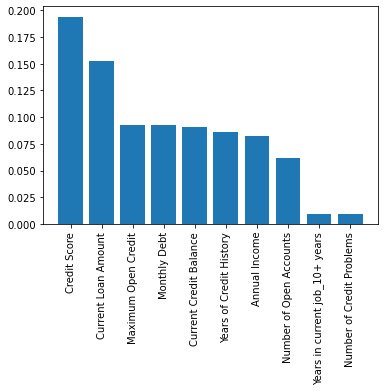

In [58]:
imp_features=RF_clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:10]
print(top_10_features)
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

__Fine Tuning Using Grid Search CV__

In [ ]:
params = {'max_features': ['sqrt','log2'],
          'n_estimators': [20, 40, 60, 80, 100],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10]
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(x_train, y_train)

print(Grid_randomF.best_params_)

In [ ]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True,**Grid_randomF.best_params_)
# clf.fit(x_train,y_train)

In [ ]:
clf_score = cross_val_score(clf, x_train, y_train, cv=3)
print(clf_score)
clf_score.mean()

In [ ]:
test_predictions=clf.predict(x_test)

In [ ]:
train_predictions=clf.predict(x_train)

In [ ]:
print("Train Accuracy: ",sm.accuracy_score(y_train,train_predictions))
print("Test Accuracy: ",sm.accuracy_score(y_test,test_predictions))

In [ ]:
sm.confusion_matrix(y_test,test_predictions)

In [ ]:
sm.classification_report(y_test,test_predictions)